In [10]:
# Script for Section 1 – Data exploration and pre-processing 
import numpy as np
import pandas as pd
import matplotlib as plt

df=pd.read_csv('RTP_traffic_dataset.csv')

In [3]:
df.head(1)

,timestamp,interarrival_std,interarrival_mean,interarrival_min,interarrival_max,interarrival_count,interarrival_kurtosis,interarrival_skew,interarrival_moment3,interarrival_moment4,...,inter_time_sequence_max_value_count_percent,num_packet_loss,software,ssrc,ip_src,ip_dst,prt_src,prt_dst,p_type,n_call
0,2020-12-14 13:34:39.500,0.011279,0.011439,0.002316,0.02405,3,-1.5,0.513926,4.014318e-07,1.079044e-08,...,0.333333,0,webrtc,0x401fff15,132.145.230.5,192.168.1.126,443,34102,114,1


In [4]:
t_max = df['timestamp'].max()
t_min = df['timestamp'].min()
print('The starting time is:',t_min)
print(' the finishing time is:',t_max)

The starting time is: 2020-04-17 07:59:45.500
 the finishing time is: 2021-01-18 15:03:18.000


In [14]:
# We check both the code of a call and software type to double check that there are no calls with same code and different type of software
#Calls=df['n_call']
#SoftwareType=df['software']
#Counter=0
#Breakpoints=[]
#for i in range(len(Calls)-1):
    #if Calls.loc[i]!=Calls.loc[i+1] or SoftwareType.loc[i]!=SoftwareType.loc[i+1] :
        #Counter=Counter+1
        #Breakpoints.append(i)


In [5]:
df['timestamp']=pd.to_datetime(df['timestamp'])
Durations=[]
P1=df['n_call'].value_counts().sort_index()
for i in P1.index:
    filt=df['n_call']==i
    P=df[filt]
    P=P.set_index(np.array(range(len(P['timestamp'])))) 
    DurationCalls=P.loc[len(P)-1]['timestamp']-P.loc[0]['timestamp']
    Durations.append(DurationCalls)
#print(Durations)
len(Durations)
print(np.array(Durations).mean())


0 days 00:41:22.632352941


In [6]:
print('The number of calls is:',len(P1))

The number of calls is: 68


In [10]:
# Delete equal stat attributes
Attributes=[]
for i in range (df.shape[1]):
    Column=df.iloc[:,i]
    Clear_Column=len(set(Column))
    Attributes.append(Clear_Column)
    print(Clear_Column)



333203
2135738
1251898
236180
543381
386
2076176
2100310
2100410
2135745
572049
1617261
1617260
5322
4200
103512
1389912
296992
1318
1373
386
1793754
1780450
1750364
1799711
1299
267569
267569
5585
4747
1132300
63900
1544
1580
386
1802028
1797283
1696284
1802613
2586
192788
192788
5056
5719
229
161978
25502
1070
1768
386
209168
208065
198549
211945
2100
11071
11071
1690
2702
137
559132
1072839
106377
104404
386
563900
594476
593779
566699
20147
1178393
1178393
454
361
250
2
2715
44
11
28
118
11
68


In [12]:
filt2=df['num_packet_loss']==0
df['label']=1
df.loc[filt2,'label']=0

In [18]:
Count_lossy=df['label'].sum()
Count_lossless= len(df['label'])-Count_lossy
print('The lossy transmissions are:',Count_lossy,'The lossless are:',Count_lossless,'out of ',len(df),'time windows')

The lossy transmissions are: 32479 The lossless are: 2105448 out of  2137927 time windows


In [26]:
import seaborn as sns
import matplotlib as plt

<Axes: ylabel='interarrival_kurtosis'>

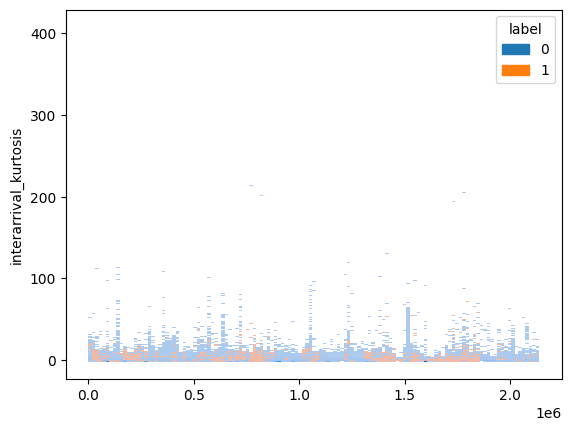

In [24]:
# some crazy guy has to run it
for i in range(1,74):
    plt.figure()
    sns.histplot(data=df,x=range(len(df)), y=df.iloc[:,i],hue='label')
    plt.show()


In [73]:
step=500
#sum_loss=df.loc[0:500,'num_packet_loss'].sum()
x_ax = np.linspace(0,len(df),42758)
x_ax= np.floor(x_ax)
start=0
losses=[]
for j in x_ax:
    sum_loss=df.loc[start:j,'num_packet_loss'].sum()
    start=j
    losses.append(sum_loss)


# sns.ecdfplot(
#     data = df,
#     x = 'timestamp', # the column that you want to compute ecdf, they will be in the order from short to long length (numerical order)
#     hue = 'type'
# )

In [88]:
TotalLoss=np.sum(df['num_packet_loss'])
LossesPercentage=[]
CntLoss=0
for j in range(df.shape[0]):
    CntLoss=CntLoss+df.loc[j,'num_packet_loss']
    Percent=CntLoss/TotalLoss
    LossesPercentage.append(Percent)







<Axes: >

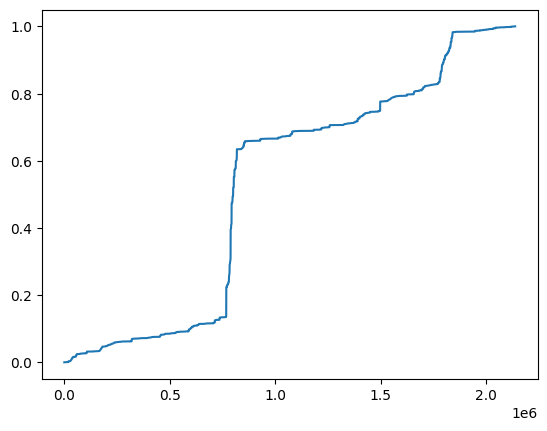

In [95]:
sns.lineplot(
    x = range(len(LossesPercentage)), # which column to use for x-axis
    y = LossesPercentage, # which column to use for y-axis
)
#plt.show()

<Axes: >

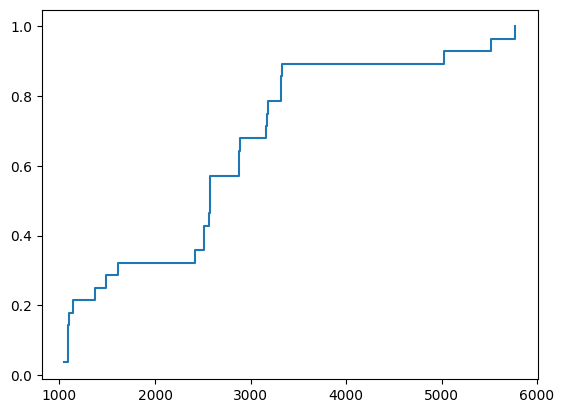

In [103]:
Filtered=(df['num_packet_loss'])[df['num_packet_loss']>1000]
ecdf_values=np.arange(1,len(Filtered)+1)/len(Filtered)
sns.lineplot(x=sorted(Filtered),y=ecdf_values,drawstyle='steps-post')
#sns.ecdfplot(
#    data = df[Filtered],
#    x ='num_packet_loss', # the column that you want to compute ecdf, they will be in the order from short to long length (numerical order)
#)

In [64]:
x_ax = np.linspace(0,len(df),213793)
x_ax

array([0.00000000e+00, 1.00000327e+01, 2.00000655e+01, ...,
       2.13790700e+06, 2.13791700e+06, 2.13792700e+06])

In [72]:
len(df)/50

42758.54

In [34]:
df['num_packet_loss'].max()

5771

<Axes: ylabel='num_packets'>

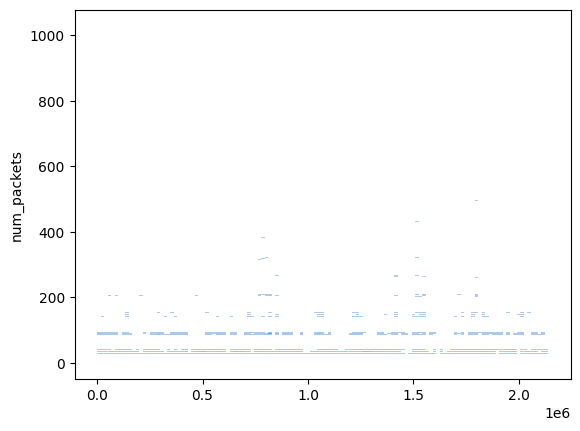

In [36]:
sns.histplot(data=df,x=range(len(df)), y='num_packets')

<Axes: ylabel='num_packet_loss'>

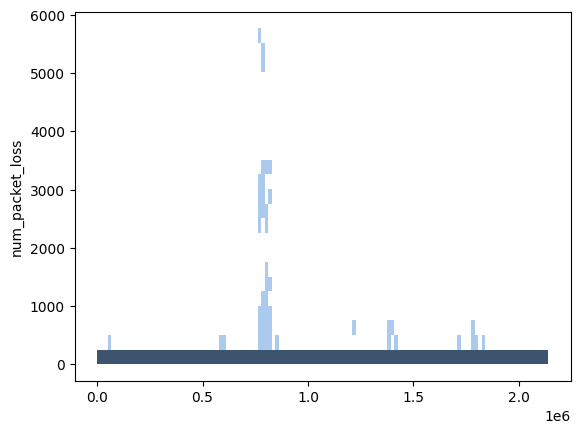

In [37]:
sns.histplot(data=df,x=range(len(df)), y='num_packet_loss')

In [56]:
np.max(df['num_packets'])
print(set(df['num_packet_loss']))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 1088, 1094, 71, 72, 73, 74, 587, 76, 1096, 78, 1609, 75, 79, 82, 595, 83, 85, 598, 80, 88, 89, 90, 91, 3164, 87, 86, 95, 96, 97, 94, 99, 3171, 101, 102, 104, 617, 105, 530, 108, 109, 110, 111, 3184, 113, 114, 115, 2567, 1141, 118, 116, 120, 112, 122, 121, 119, 127, 128, 129, 534, 132, 133, 2571, 136, 137, 5771, 140, 653, 141, 142, 144, 147, 148, 149, 150, 152, 153, 161, 1050, 164, 165, 2577, 167, 169, 170, 172, 2580, 182, 695, 186, 187, 190, 193, 194, 196, 197, 198, 711, 200, 718, 719, 206, 720, 208, 211, 212, 213, 215, 216, 217, 220, 106, 226, 228, 230, 231, 234, 235, 237, 238, 241, 244, 3322, 3323, 3328, 261, 267, 272, 274, 275, 282, 283, 284, 798, 288, 802, 299, 301, 307, 827, 2880, 321, 2883, 2887, 328, 844, 347, 1372, 

In [77]:
sns.ecdfplot(
    data = df,
    x = df.loc[x_ax,'num_packet_loss'], # the column that you want to compute ecdf, they will be in the order from short to long length (numerical order)
)

KeyError: '[2137927.0] not in index'